# Read the configuration files

## Create the crowd object

In [1]:
from pathlib import Path
import configuration.backup.dict_to_xml_and_reverse as fun_xml
from configuration.models.crowd import create_agents_from_dynamic_static_geometry_parameters

# Open the configuration files, read them, and convert them to dictionaries
config_files_folder_path = Path.cwd().parent.parent / "data" / "xml" / "crowd2D_ANSURII_tutorial"

with open(config_files_folder_path / "Agents.xml", encoding="utf-8") as f:
    crowd_xml = f.read()
static_dict = fun_xml.static_xml_to_dict(crowd_xml)

with open(config_files_folder_path / "Geometry.xml", encoding="utf-8") as f:
    geometry_xml = f.read()
geometry_dict = fun_xml.geometry_xml_to_dict(geometry_xml)

with open(config_files_folder_path / "AgentDynamics.xml", encoding="utf-8") as f:
    dynamic_xml = f.read()
dynamic_dict = fun_xml.dynamic_xml_to_dict(dynamic_xml)

# Create the Crowd object and populate it with the data from the dictionaries
crowd = create_agents_from_dynamic_static_geometry_parameters(
    static_dict=static_dict,
    dynamic_dict=dynamic_dict,
    geometry_dict=geometry_dict,
)

## Display the crowd

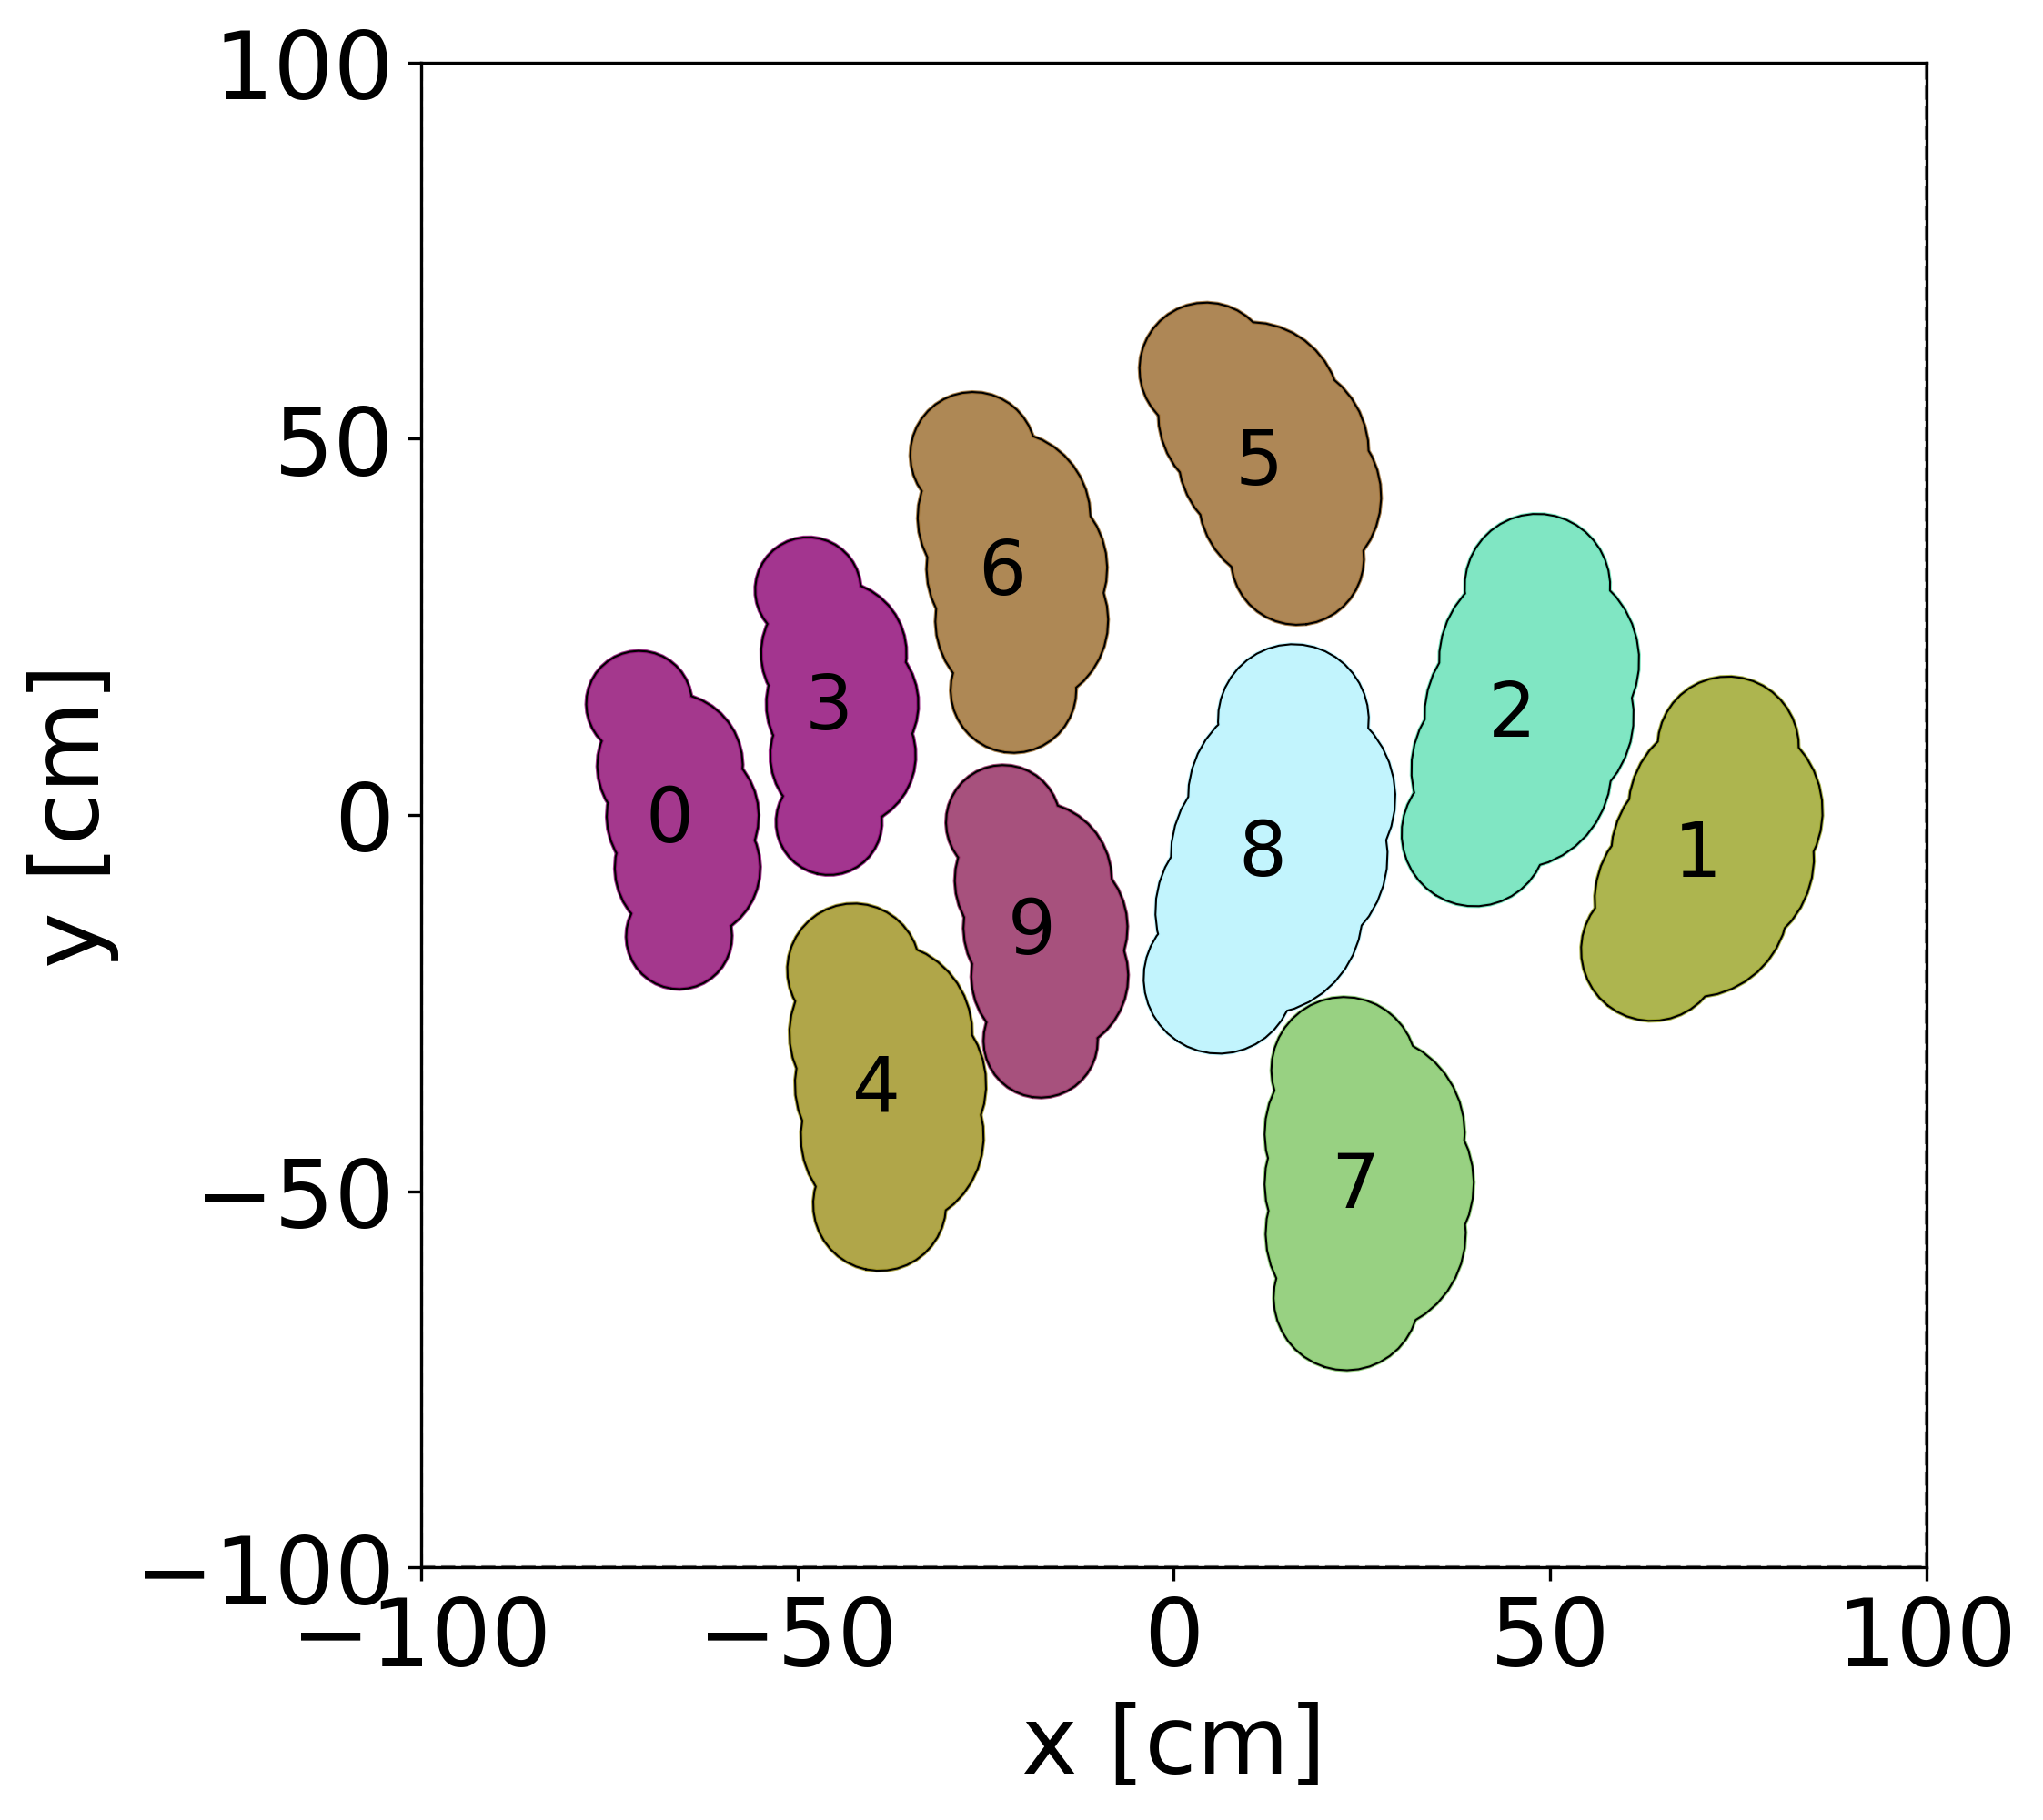

In [2]:
from streamlit_app.plot import plot
import matplotlib.pyplot as plt

plot.display_crowd2D(crowd)
plt.show()

## Get some anthropometric statistics from the created crowd

In [3]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'male_bideltoid_breadth_max': 55.8,
 'male_bideltoid_breadth_mean': 48.42,
 'male_bideltoid_breadth_min': 44.6,
 'male_bideltoid_breadth_std_dev': 3.6979874406372875,
 'male_chest_depth_max': 28.799999999999997,
 'male_chest_depth_mean': 24.840000000000003,
 'male_chest_depth_min': 20.200000000000003,
 'male_chest_depth_std_dev': 3.1885907719729585,
 'male_height_max': 180.0,
 'male_height_mean': 171.2,
 'male_height_min': 152.0,
 'male_height_std_dev': 10.206751578135806,
 'male_proportion': 1.0,
 'male_weight_max': 104.33,
 'male_weight_mean': 76.20400000000001,
 'male_weight_min': 52.62,
 'male_weight_std_dev': 16.323531208384754,
 'pedestrian_proportion': 1.0}


In [4]:
# Print the numbers observables
pprint.pprint(crowd_statistics["stats_counts"])

{'bike_number': 0, 'male_number': 10, 'pedestrian_number': 10}


In [5]:
# Print the detailed distribution of the other observables
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["stats_lists"]))

{'male_bideltoid_breadth': [45.4,
                            47.599999999999994,
                            53.2,
                            45.0,
                            49.0,
                            45.599999999999994,
                            48.400000000000006,
                            49.6,
                            55.8,
                            44.6],
 'male_chest_depth': [20.200000000000003,
                      27.0,
                      27.800000000000004,
                      20.200000000000003,
                      25.4,
                      25.4,
                      24.0,
                      27.800000000000004,
                      28.799999999999997,
                      21.8],
 'male_height': [180.0,
                 173.0,
                 180.0,
                 170.0,
                 180.0,
                 152.0,
                 175.0,
                 165.0,
                 180.0,
                 157.0],
 'male_weight': [62.14,
 